In [4]:
#go into the results/images folder and extract the numbers for each file name and put them in a list

import os
import re

#go into the results/images folder and extract the numbers for each file name and put them in a list
def get_image_numbers(file_path):
    image_numbers = []
    for filename in os.listdir(file_path):
        image_numbers.append(int(re.search(r'\d+', filename).group()))
    return image_numbers

numbers = get_image_numbers(file_path="/users/rittscher/qdv200/pytorch-CycleGAN-and-pix2pix/results/ihc2he/test_latest/images")


In [5]:
#remove duplicates and sort the list
numbers = list(set(numbers))
numbers.sort()
#numbers


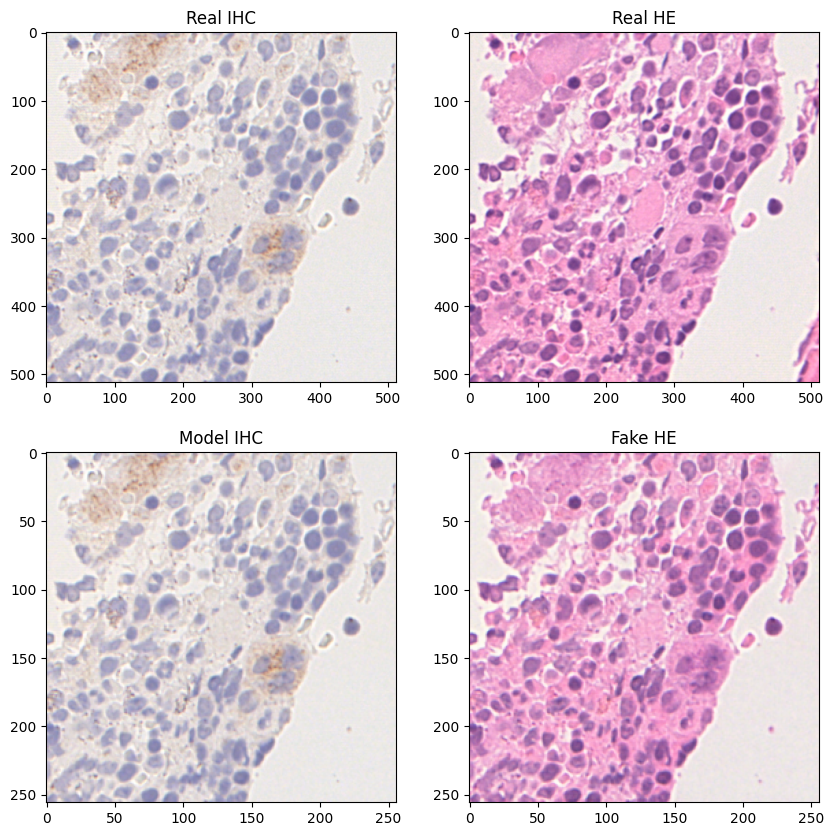

In [55]:
import cv2
import numpy as np

num = numbers[10]

#load the images

real_ihc_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ihc2he/testA/"
real_he_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/ihc2he/testB/"
results_folder = "/users/rittscher/qdv200/pytorch-CycleGAN-and-pix2pix/results/ihc2he/test_latest/images/"

real_ihc = cv2.imread(real_ihc_folder + "bET-CALR_{}.png".format(num))
real_he = cv2.imread(real_he_folder + "bET-CALR_{}.png".format(num))
fake_he = cv2.imread(results_folder + "bET-CALR_{}_fake.png".format(num))
model_ihc = cv2.imread(results_folder + "bET-CALR_{}_real.png".format(num))

#plot the images as subplots

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(real_ihc)
ax[0,0].set_title("Real IHC")
ax[0,1].imshow(real_he)
ax[0,1].set_title("Real HE")
ax[1,0].imshow(model_ihc)
ax[1,0].set_title("Model IHC")
ax[1,1].imshow(fake_he)
ax[1,1].set_title("Fake HE")

#show the plot
plt.show()



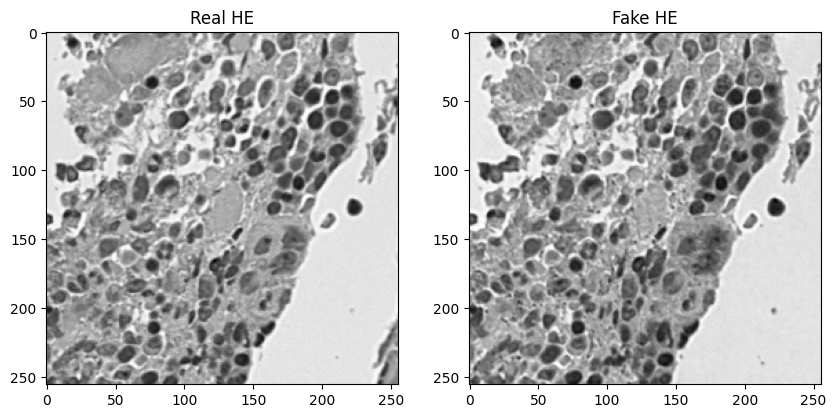

In [56]:
#https://www.tutorialspoint.com/how-to-compare-two-images-in-opencv-python
#https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/VELDHUIZEN/node18.html
#https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/
#https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html#sphx-glr-auto-examples-transform-plot-ssim-py
#https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/

#assess differences between real he and fake he

from skimage.metrics import structural_similarity as compare_ssim
import cv2
import imutils

imageA = cv2.imread(real_he_folder + "bET-CALR_{}.png".format(num))
imageB = cv2.imread(results_folder + "bET-CALR_{}_fake.png".format(num))

#resize the images to 256x256

imageA = cv2.resize(imageA, (256, 256))

# convert the images to grayscale

grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

#show gray scale images

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(grayA, cmap="gray")
ax[0].set_title("Real HE")
ax[1].imshow(grayB, cmap="gray")
ax[1].set_title("Fake HE")

#show the plot
plt.show()


In [57]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.8023041198888312


In [58]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

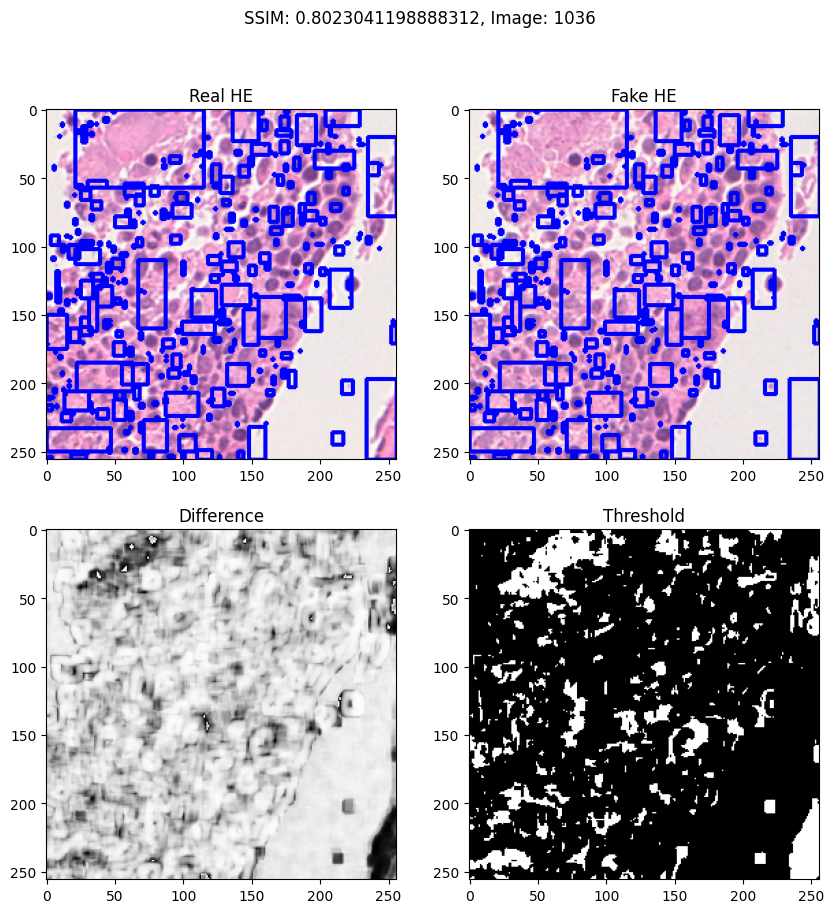

In [59]:
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

#as subplots

fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0, 0].imshow(imageA)
ax[0, 0].set_title("Real HE")
ax[0, 1].imshow(imageB)
ax[0, 1].set_title("Fake HE")
ax[1, 0].imshow(diff, cmap="gray")
ax[1, 0].set_title("Difference")
ax[1, 1].imshow(thresh, cmap="gray")
ax[1, 1].set_title("Threshold")


#show the plot
fig.suptitle("SSIM: {}, Image: {}".format(score, num))
plt.show()